# Reading and plotting graph-percolation data

In [31]:
import os
#%cd "C:/Users/fandreoli/Github Repos/random_graph_percolation"
print("The working directory is: ", str(os.getcwd()))
data_dir = "Data\\"

The working directory is:  c:\Users\fandreoli\Github Repos\random_graph_percolation


## Computing the data

### Graph size choice

In [43]:
N_nodes = 10**6
override_data = [True, False][0]

In [42]:
def time_display(time_sec):
    return time.strftime("%H:%M:%S", time.gmtime(time_sec ))

def dir_create(dir_path):
    try:
        os.mkdir(dir_path)
        print(f"Created directory '{dir_path}'.")
    except FileExistsError:
        pass
    except PermissionError:
        print(f"Permission denied: Unable to create '{dir_path}'.")
    except Exception as e:
        raise(f"When creating {dir_path}, the following error occurred: {e}")

if "g_mean_"+str(N_nodes)+".dat" in set(os.listdir(data_dir)) and not override_data:
    print("The data have already been computed.")
else:
    import time
    print("Executing the C script to compute the data.")
    dir_create(data_dir)
    dir_create(data_dir+"\\Temp")
    time_start = time.time()
    os.system('gcc random_graph.c -o random_graph.exe')
    time_compile = time.time()
    os.system('random_graph.exe '+str(N_nodes)+' '+data_dir)
    time_end = time.time()
    print("Script completed in ",time_display(time_end-time_start))
    print("Compilation time: ",time_display(time_compile-time_start))
    print("Execution time: ",time_display(time_end-time_compile))

Executing the C script to compute the data.
Script completed in  00:00:02
Compilation time:  00:00:00
Execution time:  00:00:01


## Importing the data

### Defining the data to import

In [37]:
graph_sizes = [int(10**pow) for pow in range(2,7)]

### Importing

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def size_file_extract(current_file):
    return int(current_file.replace("g_mean_","").replace(".dat",""))
    
file_names = ["g_mean_"+str(sizes)+".dat" for sizes in graph_sizes]
file_names = set(file_names) & set(os.listdir(data_dir))
file_names = list(file_names)
file_names.sort()
graph_sizes = [size_file_extract(current_file) for current_file in file_names]
print("Sizes to analyze: ", graph_sizes)

sol_dict=dict({})
for i,current_file in enumerate(file_names):
    size = graph_sizes[i]
    current_file = data_dir+current_file
    try:
        sol_dict[size] = pd.read_csv(current_file, delimiter=",")
    except Exception as error_here:
        print("You got an error when either parsing the data file:", current_file)
        raise(error_here)
    sol_dict[size].columns = [col.replace(" ", "") for col in sol_dict[size].columns]
 

Sizes to analyze:  [100, 1000, 10000, 100000]


## Plotting the data

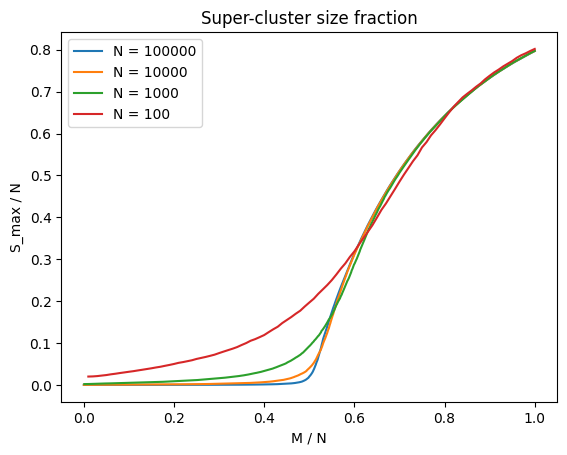

In [39]:
for size in reversed(graph_sizes):
    plt.plot(sol_dict[size]['c'], sol_dict[size]['Smax_mean'],label="N = "+str(size));
    
plt.legend()
plt.xlabel("M / N")
plt.ylabel("S_max / N")
plt.title("Super-cluster size fraction")

plt.show()